<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Anthony Mauricio Goyes Díaz  <br>
Fecha: 27/07/2022

# Importación de librerias necesarias

In [21]:
#Para esta actividad se importarán las siguientes librerías:
'''Se importa la librería de pandas para importar la colección de datos'''
import pandas as pd
'''Se importa la librería de LabelEndocer para transformar de categórico a numérico'''
from sklearn.preprocessing import LabelEncoder
'''Se importa la siguiente librería para entrenamiento y prueba de la colección de datos'''
from sklearn.model_selection import train_test_split
'''Se importa la librería SVM para trabajar con el modelo SVM "(Support Vector Machine)"'''
from sklearn import svm
'''Se importa la librería de métricas para evaluar el rendimiento del modelo'''
from sklearn import metrics

## Cargar el Dataset

In [3]:
#Código para cargar el Dataset
'''Se carga la colección de datos mediante un archivo separado por comas "(csv)"'''
df = pd.read_csv("mushrooms.csv", sep=",")
'''Se visualiza los registros de la colección de datos'''
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Descripción de la fuente del Dataset

In [4]:
'''Se observa una descripción estadística de los registros de la colección de datos'''
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Este conjunto de datos contiene un total de 8.124 registros e incluye descripciones de muestras hipotéticas correspondientes a 23 especies de setas con agallas de la familia Agaricus y Lepiota extraídas de The Audubon Society Field Guide to North American Mushrooms (1981). Cada especie se identifica como definitivamente comestible, definitivamente venenosa, o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa.
Colección de datos extraída de: https://www.kaggle.com/datasets/uciml/mushroom-classification

## Características de entrada || Variables independientes
**cap-shape**: Categórica. Forma del casquete y puede ser acampanado=b,cónico=c,convexo=x,plano=f,nudoso=k,hundido=s<br>
**cap-surface**: Categórica. Superficie del sombrero y puede ser fibrosa=f,acanalada=g,escamosa=y,lisa=s<br>
**cap-color**: Categórica. Color del capuchón y puede ser marrón=n,buff=b,canela=c,gris=g,verde=r, rosa=p,púrpura=u,rojo=e,blanco=w,amarillo=y<br>
**bruises?**: Categórica. Moretones puede ser Verdadero(si)=t y Falso(no)=f<br>
**odor**: Categórica. Olor y puede ser almendra=a,anís=l,creosota=c,a pescado=y,fétido=f, a moho=m,ninguno=n,acre=p,picante=s<br>
**gill-attachment**: Categórica. Fijación de la agalla y puede ser adjunta=a,descendente=d,libre=f,dentada=n<br>
**gill-spacing**: Categórica. Espaciado de las agallas y puede ser cerca=c,amontonado=w,distante=d<br>
**gill-size**: Categórica. Tamaño de las branquias y puede ser ancho=b,estrecho=n<br>
**gill-color**: Categórica. Color de las agallas y puede ser negro=k,marrón=n,buff=b,chocolate=h,gris=g, verde=r,naranja=o,rosa=p,púrpura=u,rojo=e, blanco=w,amarillo=y<br>
**stalk-shape**: Categórica. Forma de los tallos y puede ser ampliando=e,estrechando=t<br>
**stalk-root**: Categórica. Tallo-raíz y puede ser bulboso=b,club=c,copa=u,igual=e, rizomorfo=z,enraizado=r,ausente=?<br>
**stalk-surface-above-ring**: Categórica. Tallo-superficie-sobre-anillo y puede ser fibroso=f,escamoso=y,sedoso=k,liso=s<br>
**stalk-surface-below-ring**: Categórica. Tallo-superficie-debajo-anillo y puede ser fibroso=f,escamoso=y,sedoso=k,liso=s<br>
**stalk-color-above-ring**: Categórica. Color del tallo por encima del anillo y puede ser marrón=n,buff=b,canela=c,gris=g,naranja=o, rosa=p,rojo=e,blanco=w,amarillo=y<br>
**stalk-color-below-ring**: Categórica. Color del tallo-bajo-anillo y puede ser marrón=n,buff=b,canela=c,gris=g,naranja=o, rosa=p,rojo=e,blanco=w,amarillo=y<br>
**veil-type**: Categórica. Tipo de velo y puede ser parcial=p,universal=u<br>
**veil-color**: Categórica. Color del velo y puede ser marrón=n,naranja=o,blanco=w,amarillo=y<br>
**ring-number**: Categórica. Número de anillo y puede ser ninguno=n,uno=o,dos=t<br>
**ring-type**: Categórica. Tipo de anillo y puede ser cobwebby=c,evanescente=e,acampanado=f,grande=l, ninguno=n,colgante=p,revestimiento=s,zona=z<br>
**spore-print-color**: Categórica. Color de la huella de la espora y puede ser <br>negro=k,marrón=n,buff=b,chocolate=h,verde=r,naranja=o,púrpura=u,blanco=w,amarillo=y<br>
**population**: Categórica. Población y puede ser abundante=a,agrupada=c,numerosa=n, dispersa=s,varias=v,solitaria=y<br>
**habitat**: Categórica. Hábitat y puede ser hierbas=g,hojas=l,prados=m,caminos=p, urbano=u,residuos=w,bosques=d<br>
## Variable Objetivo || Variable dependiente
**class**: Categórica. Describe a la clase de la seta si es comestible=e o venenosa=p

## Explique el problema a resolver. 
La colección de datos tiene la finalidad de dar a conocer las características puntuales de las setas para conocer si son comestibles o venenosas, considerándose esta como la variable objetivo (**class**) 

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


## Número total de instancias

In [5]:
#Código que responde a la descripción anterior
# Se contabiliza el total de instancias de la colección de datos
instancias =df.count().mean()
# Se imprime el total de instancias calculada
print(f"El total de instanacias son: "+str(instancias)) 

El total de instanacias son: 8124.0


## Número de atributos de entrada, su significado y tipo

**cap-shape**: Categórica. Forma del casquete y puede ser acampanado=b,cónico=c,convexo=x,plano=f,nudoso=k,hundido=s<br>
**cap-surface**: Categórica. Superficie del sombrero y puede ser fibrosa=f,acanalada=g,escamosa=y,lisa=s<br>
**cap-color**: Categórica. Color del capuchón y puede ser marrón=n,buff=b,canela=c,gris=g,verde=r, rosa=p,púrpura=u,rojo=e,blanco=w,amarillo=y<br>
**bruises?**: Categórica. Moretones puede ser Verdadero(si)=t y Falso(no)=f<br>
**odor**: Categórica. Olor y puede ser almendra=a,anís=l,creosota=c,a pescado=y,fétido=f, a moho=m,ninguno=n,acre=p,picante=s<br>
**gill-attachment**: Categórica. Fijación de la agalla y puede ser adjunta=a,descendente=d,libre=f,dentada=n<br>
**gill-spacing**: Categórica. Espaciado de las agallas y puede ser cerca=c,amontonado=w,distante=d<br>
**gill-size**: Categórica. Tamaño de las branquias y puede ser ancho=b,estrecho=n<br>
**gill-color**: Categórica. Color de las agallas y puede ser negro=k,marrón=n,buff=b,chocolate=h,gris=g, verde=r,naranja=o,rosa=p,púrpura=u,rojo=e, blanco=w,amarillo=y<br>
**stalk-shape**: Categórica. Forma de los tallos y puede ser ampliando=e,estrechando=t<br>
**stalk-root**: Categórica. Tallo-raíz y puede ser bulboso=b,club=c,copa=u,igual=e, rizomorfo=z,enraizado=r,ausente=?<br>
**stalk-surface-above-ring**: Categórica. Tallo-superficie-sobre-anillo y puede ser fibroso=f,escamoso=y,sedoso=k,liso=s<br>
**stalk-surface-below-ring**: Categórica. Tallo-superficie-debajo-anillo y puede ser fibroso=f,escamoso=y,sedoso=k,liso=s<br>
**stalk-color-above-ring**: Categórica. Color del tallo por encima del anillo y puede ser marrón=n,buff=b,canela=c,gris=g,naranja=o, rosa=p,rojo=e,blanco=w,amarillo=y<br>
**stalk-color-below-ring**: Categórica. Color del tallo-bajo-anillo y puede ser marrón=n,buff=b,canela=c,gris=g,naranja=o, rosa=p,rojo=e,blanco=w,amarillo=y<br>
**veil-type**: Categórica. Tipo de velo y puede ser parcial=p,universal=u<br>
**veil-color**: Categórica. Color del velo y puede ser marrón=n,naranja=o,blanco=w,amarillo=y<br>
**ring-number**: Categórica. Número de anillo y puede ser ninguno=n,uno=o,dos=t<br>
**ring-type**: Categórica. Tipo de anillo y puede ser cobwebby=c,evanescente=e,acampanado=f,grande=l, ninguno=n,colgante=p,revestimiento=s,zona=z<br>
**spore-print-color**: Categórica. Color de la huella de la espora y puede ser <br>negro=k,marrón=n,buff=b,chocolate=h,verde=r,naranja=o,púrpura=u,blanco=w,amarillo=y<br>
**population**: Categórica. Población y puede ser abundante=a,agrupada=c,numerosa=n, dispersa=s,varias=v,solitaria=y<br>
**habitat**: Categórica. Hábitat y puede ser hierbas=g,hojas=l,prados=m,caminos=p, urbano=u,residuos=w,bosques=d<br>

In [6]:
df.drop('class', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

## Estadísticas de la variable objetivo.

<AxesSubplot:>

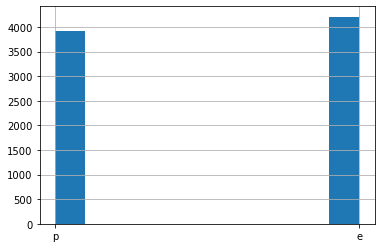

In [7]:
df['class'].hist()

Se puede observar que mediante el histograma de la variable objetivo (clase) no se tiene una forma de campana lo que afirma que no debe aplicarse regrsión lineal sino clasifiacación, como en este caso, clasificación binaria porque se pretende conocer si la seta fue clasificada como comestible o venenosa. Además, la gráfica permite conocer que se tiene un equilibrio estando entre 3800 registros a 4100 registros

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [8]:
'''Se contabiliza el número total de instancias con datos nulos'''
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
'''Se contabiliza el número total de instancias con datos vacíos'''
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
'''Se convierte de tipo objeto a categórico'''
df = df.astype('category')
'''Se visualiza el cambio en el tipo de datos de las características'''
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [15]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
df = df.drop(["veil-type"],axis=1)

## División del dataset en datos de entrenamiento y datos de test 

In [24]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
'''Se asigna a una variable "y" los valores de la variable objetivo'''
y = df["class"].values
'''Se asigna a una variable "x" los valores de las variables de entrada'''
x = df.drop(["class"], axis=1).values
'''Se divide la información, siedo 80% para entrenamiento y 20% para prueba'''
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## Modelamiento

In [25]:
#Código del modelo
'''Se instancia el modleo SVM y se lo almacena en cfl'''
clf = svm.SVC(kernel='linear')

In [26]:
#Entrenamiento
'''Se entrena al modelo con los datos de entrenamiento instanciados anteriormente'''
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [28]:
#Test
'''Se genera las predicciones del modelo'''
y_pred = clf.predict(x_test)

## Evaluación del Modelo

- La colección de datos seleccionada no contenía ningún dato nulo o vacío, por lo tanto, no fue necesario realizar una limpieza de datos.
- Una de las características de entrada, tipo de velo (veil-type), tiene un total de una única clase por lo que se la eliminó de la colección de datos a entrenar debido a que no aporta nada al modelo predictivo
- Debido a que en la colección de datos todas las características, tanto de entrada como salida (objetivo) son de tipo de dato categórico y fue necesario aplicar la técnica de preprocesamiento de datos LabelEncoder a cada una de las características para convertirlas a numéricas.
- El modelo usado fue SVM (Support Vector Machine) o Máquina de vectores de apoyo y mediante una distribución del 80% de los datos para entrenamiento y 20% para pruebas, se obtuvo como resultado una precisión del 97%. Por lo tanto, se concluye que el modelo predictivo generado tiene un gran porcentaje de acierto para categorizar las setas entre comestibles y venenosas.

In [29]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9729230769230769
Precision: 0.9817232375979112
Recall: 0.9616368286445013
